In [1]:
import graph_tool.all as gt
from math import sqrt

In [2]:
from random import *

In [3]:
csvGraphsPath="../graphs/csv/"
csvGraphFileName="facebook_combined.csv"
csvGraphFilePath=csvGraphsPath+csvGraphFileName
fbGraph=gt.load_graph_from_csv(csvGraphFilePath)

In [4]:
import igraph as ig

In [136]:
F=ig.Graph.Read("../graphs/ncol/facebook_combined.txt",format="ncol").as_undirected()

In [163]:
partition=F.community_multilevel()

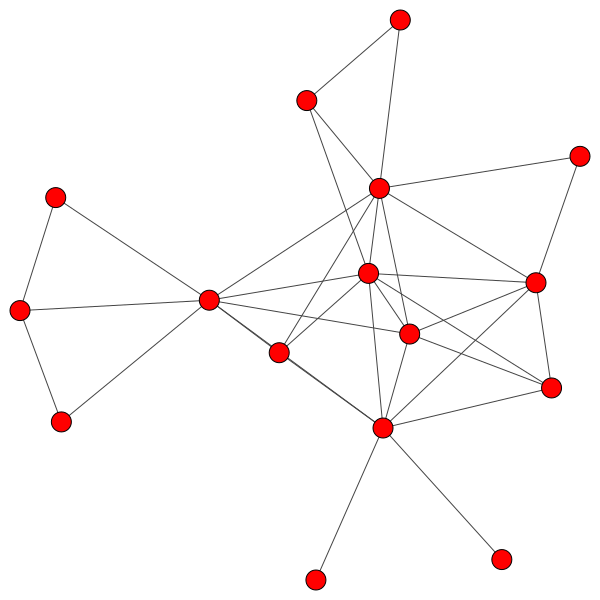

In [164]:
clusters=partition.cluster_graph()
ig.plot(clusters)

In [165]:
len(clusters.vs)

16

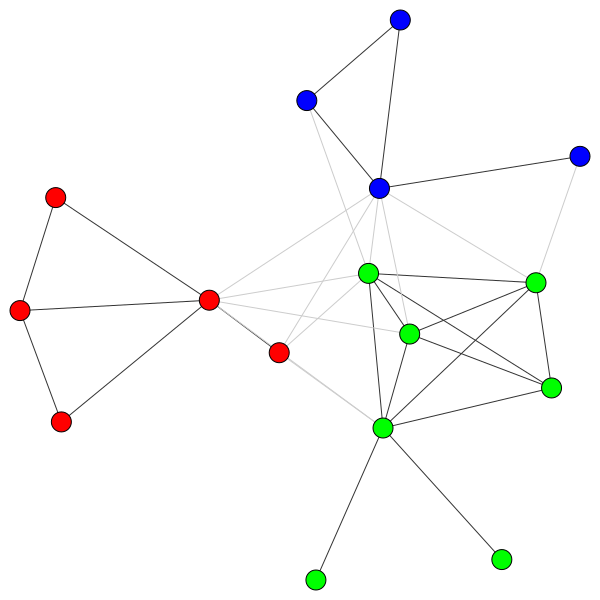

In [166]:
subpartition=clusters.community_leading_eigenvector()
ig.plot(subpartition)

In [167]:
len(subpartition)

3

In [168]:
for c in partition:
    color=[random(),random(),random(),1.]
    for v in c:
        partition.graph.vs[v]["color"]=color
        for e in partition.graph.incident(v):
            ed=partition.graph.es[e]
            if ed.source in c and ed.target in c:
                ed["color"]=[0.,0.,0.,1.]
            else:
                ed["color"]=[0.5,0.5,0.5,1.]

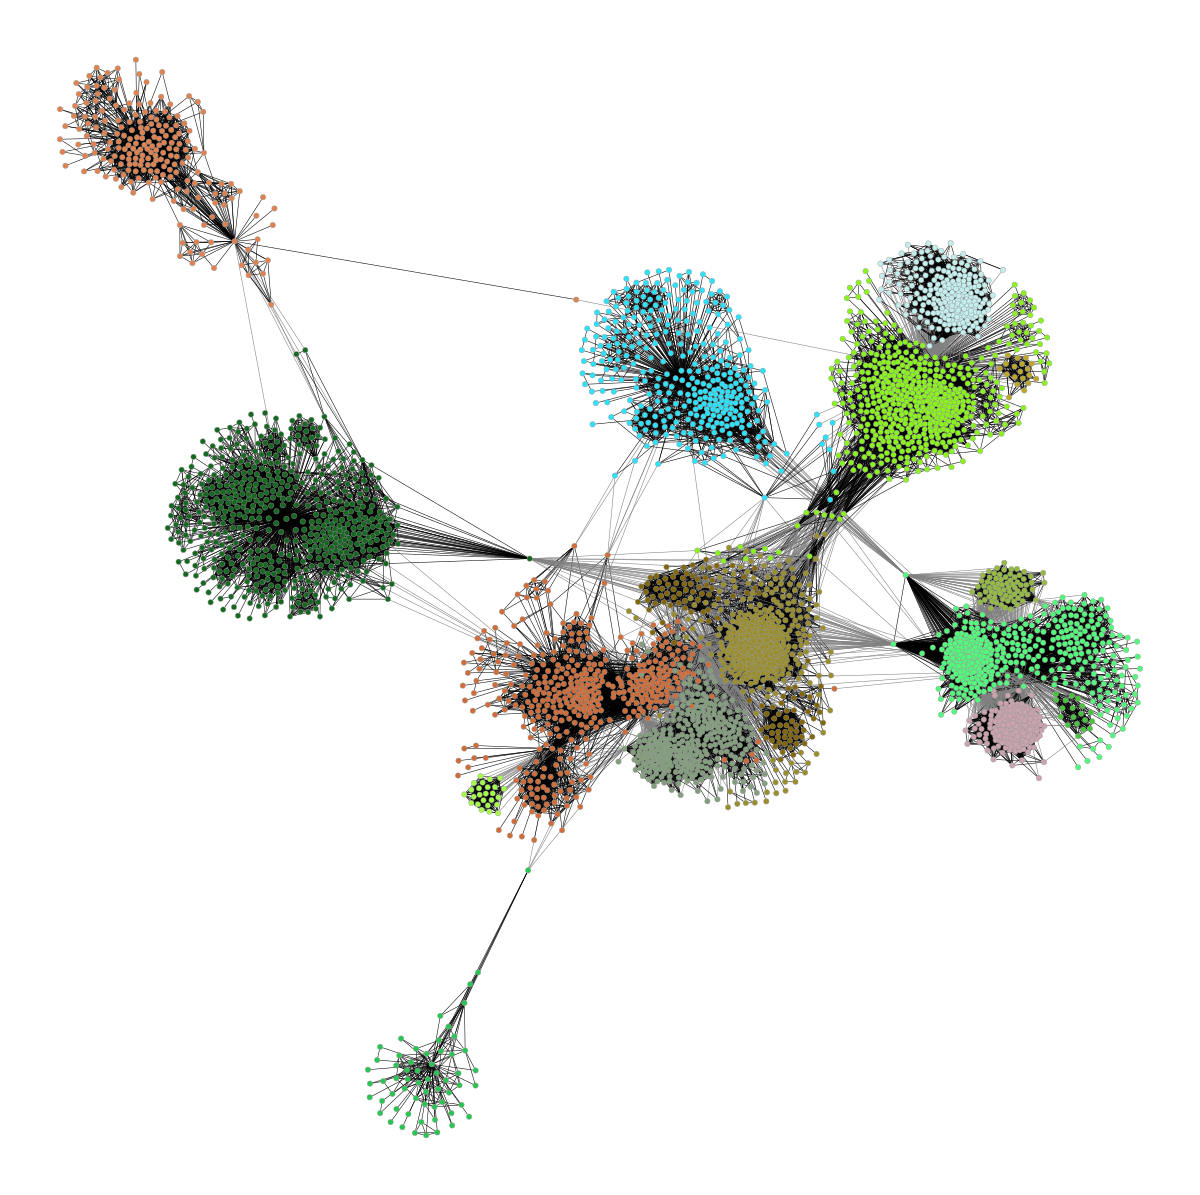

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f32676ba880, at 0x7f3267c96790>

In [169]:
G=partition.graph.to_graph_tool(vertex_attributes={"color":"vector<float>"},edge_attributes={"color":"vector<float>"})
gt.graph_draw(G, vertex_fill_color=G.vertex_properties["color"],edge_color=G.edge_properties["color"])